In [ ]:
# It uses the same data-preparation steps from Milestone 1 and then demonstrates the naive approach,
# where tomorrow's price = today's price.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# ====== STEP 1: LOAD & INSPECT DATA ======
# We  have a 'dataset.csv' containing cryptocurrency data,
# including columns like date, open, high, low, close, etc.

df = pd.read_csv("dataset.csv")
print("Initial DataFrame shape:", df.shape)
print("First 5 rows of the dataset:")
display(df.head())

# Check if there's a 'date' column to convert into a proper datetime index
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

print("\nInfo after possibly setting 'date' as index:")
display(df.info())

Initial DataFrame shape: (72946, 10)
First 5 rows of the dataset:


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07



Info after possibly setting 'date' as index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72946 entries, 2013-05-05 to 2022-10-23
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 5.6+ MB


None

In [ ]:
# ====== STEP 2: BASIC CLEANING ======
# Drop columns you don't need (example columns listed here)
for col in ['Unnamed: 0', 'timestamp']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# If there's a crypto_name column, we only want "Bitcoin"
if 'crypto_name' in df.columns:
    df = df[df['crypto_name'] == 'Bitcoin']
    df.drop(columns=['crypto_name'], inplace=True)

# Check for missing values
print("\nMissing values before interpolation:")
display(df.isnull().sum())

# Interpolate any missing values linearly
df.interpolate(method='linear', inplace=True)

print("\nMissing values after interpolation:")
display(df.isnull().sum())


Missing values before interpolation:


<ipython-input-12-81239f411159>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['crypto_name'], inplace=True)


,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0



Missing values after interpolation:


<ipython-input-12-81239f411159>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)


,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0


In [ ]:
# ====== STEP 3: OUTLIER REMOVAL ======
# We remove extreme outliers using the Interquartile Range (IQR) if needed.
price_cols = ['open', 'high', 'low', 'close']
df.dropna(subset=price_cols, inplace=True)

Q1 = df[price_cols].quantile(0.25)
Q3 = df[price_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~((df[price_cols] < lower_bound) | (df[price_cols] > upper_bound)).any(axis=1)
df = df[mask]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (2810, 6)


In [ ]:

# ====== STEP 4:  FEATURE ENGINEERING ======
# Here we can add simple moving averages, daily returns, etc.

if 'close' in df.columns:
    df['SMA_7'] = df['close'].rolling(window=7).mean()
    df['SMA_30'] = df['close'].rolling(window=30).mean()
    df['Daily_Return'] = df['close'].pct_change()
    df.dropna(inplace=True)  # remove any new NaNs from rolling or diff

print("Data after feature engineering:")
display(df.head())

Data after feature engineering:


,open,high,low,close,volume,marketCap,SMA_7,SMA_30,Daily_Return
date,,,,,,,,,
2013-07-02,88.050003,92.300003,87.510002,90.134003,0.0,1.024082e+09,95.696886,105.314473,0.023668
2013-07-03,90.404999,90.981201,76.979202,77.529999,0.0,8.812331e+08,91.915458,103.824740,-0.139836
2013-07-04,78.889999,83.105003,72.000000,80.525803,0.0,9.156186e+08,88.928144,102.461600,0.038641
2013-07-05,79.989998,80.000000,65.526001,68.431000,0.0,7.784112e+08,85.182687,100.687634,-0.150198
2013-07-06,68.504997,75.000000,66.820000,70.277298,0.0,7.997416e+08,81.651729,99.096877,0.026980


In [ ]:
# ====== STEP 5: TRAIN/TEST SPLIT ======
# For a naive approach, all we really need is the 'close' column.
# But let's keep the same structure for consistency with future models.

df['Y'] = df['close'].shift(-1)  # tomorrow's price
df.dropna(inplace=True)  # remove the last row that becomes NaN


feature_cols = ['open','high','low','close','SMA_7','SMA_30','Daily_Return']
feature_cols = [c for c in feature_cols if c in df.columns]  # only use columns that exist

X = df[feature_cols]
Y = df['Y']

# We'll do an 80/20 split, no shuffle because it's time-series
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 2200
Test set size: 551


In [ ]:
# ====== STEP 6: NAIVE BASELINE ======
# The naive idea: "Tomorrow's price = Today's price."
# We'll create a column in 'df' called 'naive_pred' = the previous day's close.

df['naive_pred'] = df['close'].shift(1)

# Now we want to evaluate how this naive prediction does on the TEST set.
# The test set corresponds to X_test's index, so let's extract those predictions.

naive_preds_test = df.loc[X_test.index, 'naive_pred']  # predicted values
actual_test = Y_test  # actual "tomorrow's close" from the data

# In some cases, the very first row might be NaN. Let's drop that if needed.
valid_mask = ~naive_preds_test.isna()
naive_preds_test = naive_preds_test[valid_mask]
actual_test = actual_test[valid_mask]

NAIVE BASELINE EVALUATION:
 MSE  = 377202.0507
 RMSE = 614.1678
 MAE  = 381.9022


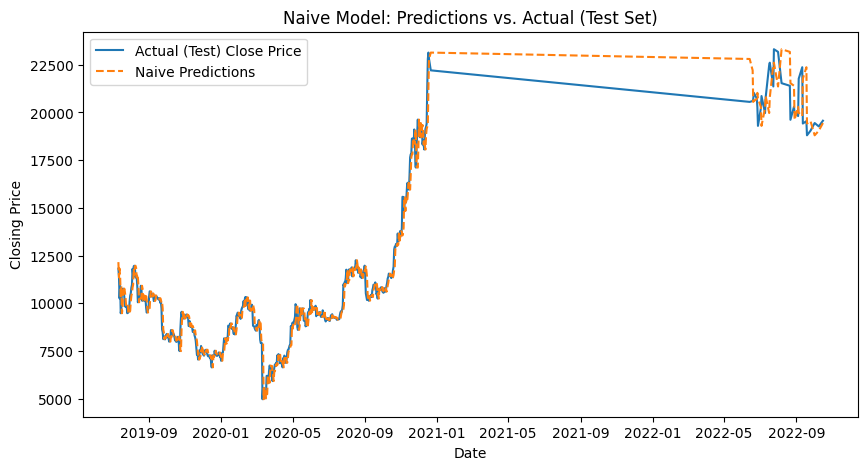

In [ ]:
# ====== STEP 7: EVALUATE NAIVE MODEL ======
mse_naive = mean_squared_error(actual_test, naive_preds_test)
rmse_naive = mse_naive ** 0.5
mae_naive = mean_absolute_error(actual_test, naive_preds_test)

print("NAIVE BASELINE EVALUATION:")
print(f" MSE  = {mse_naive:.4f}")
print(f" RMSE = {rmse_naive:.4f}")
print(f" MAE  = {mae_naive:.4f}")

# OPTIONAL: Plot to see how naive predictions compare to actual
plt.figure(figsize=(10,5))
plt.plot(actual_test.index, actual_test, label='Actual (Test) Close Price')
plt.plot(naive_preds_test.index, naive_preds_test, label='Naive Predictions', linestyle='--')
plt.title("Naive Model: Predictions vs. Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [ ]:
print("Baseline (Naive) Done.")

Baseline (Naive) Done.
